In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my124.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my311.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my587.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/208.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my506.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my510.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my208.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my471.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my789.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/0my42.jpg
/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/my365.jpg
/kaggle/input/indian-si

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LambdaCallback

# Constants
IMG_SIZE = (64, 64)  # Resize images
SEQUENCE_LENGTH = 10  # Number of frames in each sequence
DATASET_PATH = "/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech"
CLASSES = sorted(os.listdir(DATASET_PATH))
NUM_CLASSES = len(CLASSES)

# Load images and create sequences
def load_data():
    X, y = [], []
    for class_index, class_name in enumerate(CLASSES):
        class_path = os.path.join(DATASET_PATH, class_name)
        images = sorted(os.listdir(class_path))
        sequence = []
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMG_SIZE)
            img = img_to_array(img) / 255.0
            sequence.append(img)
            if len(sequence) == SEQUENCE_LENGTH:
                X.append(sequence)
                y.append(class_index)
                sequence = []  # Reset sequence
    return np.array(X), np.array(y)


In [ ]:
# Load dataset
X, y = load_data()
y = to_categorical(y, NUM_CLASSES)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN-LSTM model with Pretrained CNN
def create_model():
    base_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
    base_cnn.trainable = False  # Freeze pretrained layers

    model = Sequential([
        TimeDistributed(base_cnn, input_shape=(SEQUENCE_LENGTH, *IMG_SIZE, 3)),
        TimeDistributed(Flatten()),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Callback to print training progress
print_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")
)

In [ ]:
# Train model
model = create_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8, verbose=1, callbacks=[print_callback])


<ipython-input-3-75eec08cbbde>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_cnn = MobileNetV2(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
323/324 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2143 - loss: 2.8304Epoch 1: Loss = 2.3148, Accuracy = 0.3654
324/324 ━━━━━━━━━━━━━━━━━━━━ 63s 82ms/step - accuracy: 0.2152 - loss: 2.8272 - val_accuracy: 0.7685 - val_loss: 1.0414
Epoch 2/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6628 - loss: 1.2123Epoch 2: Loss = 1.0813, Accuracy = 0.6852
324/324 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6629 - loss: 1.2119 - val_accuracy: 0.8472 - val_loss: 0.5814
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7735 - loss: 0.7614Epoch 3: Loss = 0.7270, Accuracy = 0.7828
324/324 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7736 - loss: 0.7613 - val_accuracy: 0.8920 - val_loss: 0.3732
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8168 - loss: 0.5573Epoch 4: Loss = 0.5269, Accuracy = 0.8302
324/324 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8168 - loss: 0.5572 - val_accuracy: 0.9136 - val_loss: 0.2545
Epoch 5/10
3

In [ ]:
# Save model
model.save("sign_language_model_lstm.h5")

# Load trained model
def load_trained_model():
    return tf.keras.models.load_model("sign_language_model_lstm.h5")


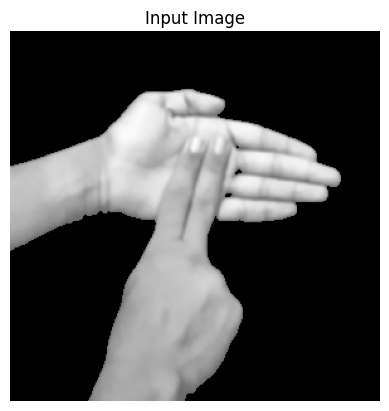

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Sign: n


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# ثوابت
IMG_SIZE = (64, 64)  # لازم يكون نفس حجم الصور اللي تدرب عليها الموديل
MODEL_PATH = "sign_language_model_lstm.h5"  # مسار الموديل اللي حفظته
CLASSES = sorted(os.listdir("/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech"))  # نفس ترتيب الكلاسات في التدريب

# تحميل الموديل
model = tf.keras.models.load_model(MODEL_PATH)

# دالة التوقع من صورة واحدة
def predict_sign(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # تحويل BGR إلى RGB علشان Matplotlib
    img_resized = cv2.resize(img, IMG_SIZE)

    # عرض الصورة
    plt.imshow(img)
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    img_array = img_to_array(img_resized) / 255.0  # تطبيع البيانات زي التدريب
    img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد batch

    prediction = model.predict(np.expand_dims(img_array, axis=0))  # إضافة بعد sequence
    predicted_class = np.argmax(prediction)
    predicted_label = CLASSES[predicted_class]

    print(f"Predicted Sign: {predicted_label}")

# مثال للاستخدام
image_path = "/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/n/208.jpg"  # حط المسار بتاع الصورة هنا
predict_sign(image_path)


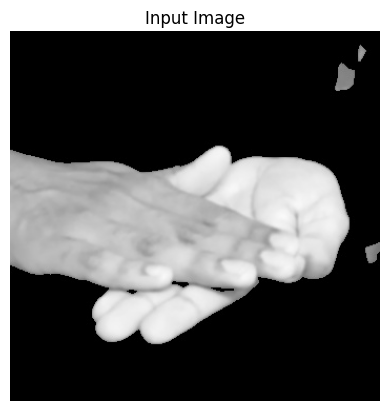

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Sign: h


In [ ]:
# مثال للاستخدام
image_path = "/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/h/39.jpg"  # حط المسار بتاع الصورة هنا
predict_sign(image_path)

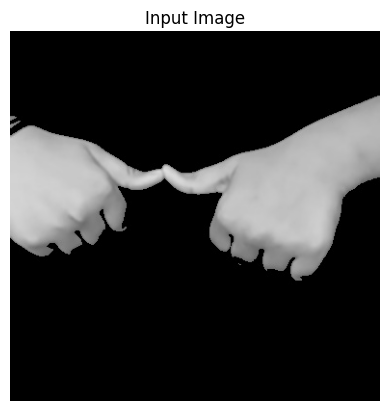

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Sign: a


In [ ]:
# مثال للاستخدام
image_path = "/kaggle/input/indian-sign-language-alphabet-dataset/dataset - Gesture Speech/a/39.jpg"  # حط المسار بتاع الصورة هنا
predict_sign(image_path)